<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python%EA%B3%A0%EC%A0%84%EC%97%AD%ED%95%99_019_Double_Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics with Python
# 파이썬으로 코딩하는 고전역학


# Double Pendulum

 <img src='https://drive.google.com/uc?export=download&id=12j-_yMftOPNpmkrb5qz3wAM-UTbGJwbE' width="200" height ="" />

In [ ]:
import sympy as sym
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [ ]:
# 중요하지 않음. 생략해도 됨.
# 기호 식(symbolic expressions)을 깔끔하게 출력하기 위한 것
sym.init_printing()

### Langrangian

In [ ]:
# 독립 변수 (시간)
t = sym.Symbol("t")
t

t

In [ ]:
# 상수
g, m1, m2, L1, L2 = sym.symbols(r"g m_1 m_2 l_1 l_2", positive=True)
g, m1, m2, L1, L2

(g, m₁, m₂, l₁, l₂)

In [ ]:
# theta1, theta2는 t의 함수로 선언
th1, th2 = sym.symbols("theta_1 theta_2", cls=sym.Function)
th1 = th1(t)
th2 = th2(t)
th1, th2

(θ₁(t), θ₂(t))

In [ ]:
# 직교 좌표 표현

# 1번 추의 좌표
x1 = L1 * sym.sin(th1)
y1 = -L1 * sym.cos(th1)

# 2번 추의 좌표
x2 = x1 + L2 * sym.sin(th2)
y2 = y1 - L2 * sym.cos(th2)

x1, y1, x2, y2

(l₁⋅sin(θ₁(t)), -l₁⋅cos(θ₁(t)), l₁⋅sin(θ₁(t)) + l₂⋅sin(θ₂(t)), -l₁⋅cos(θ₁(t))  ↪

↪ - l₂⋅cos(θ₂(t)))

In [ ]:
# 직교 좌표 표현의 시간 미분
x1_dot = sym.diff(x1, t)
x2_dot = sym.diff(x2, t)
y1_dot = sym.diff(y1, t)
y2_dot = sym.diff(y2, t)

x1_dot, y1_dot, x2_dot, y2_dot

⎛              d                        d                        d             ↪
⎜l₁⋅cos(θ₁(t))⋅──(θ₁(t)), l₁⋅sin(θ₁(t))⋅──(θ₁(t)), l₁⋅cos(θ₁(t))⋅──(θ₁(t)) + l ↪
⎝              dt                       dt                       dt            ↪

↪              d                        d                         d        ⎞
↪ ₂⋅cos(θ₂(t))⋅──(θ₂(t)), l₁⋅sin(θ₁(t))⋅──(θ₁(t)) + l₂⋅sin(θ₂(t))⋅──(θ₂(t))⎟
↪              dt                       dt                        dt       ⎠

In [ ]:
# 에너지
T = (1/2) * m1 * (x1_dot**2 + y1_dot**2) + (1/2) * m2 * (x2_dot**2 + y2_dot**2)
V = m1 * g * y1 + m2 * g * y2

# 라그랑지안
L = T - V
L

                                                                    ⎛          ↪
                                                                    ⎜  2    2  ↪
g⋅l₁⋅m₁⋅cos(θ₁(t)) - g⋅m₂⋅(-l₁⋅cos(θ₁(t)) - l₂⋅cos(θ₂(t))) + 0.5⋅m₁⋅⎜l₁ ⋅sin ( ↪
                                                                    ⎝          ↪

↪                   2                              2⎞          ⎛               ↪
↪        ⎛d        ⎞      2    2        ⎛d        ⎞ ⎟          ⎜⎛              ↪
↪ θ₁(t))⋅⎜──(θ₁(t))⎟  + l₁ ⋅cos (θ₁(t))⋅⎜──(θ₁(t))⎟ ⎟ + 0.5⋅m₂⋅⎜⎜l₁⋅sin(θ₁(t)) ↪
↪        ⎝dt       ⎠                    ⎝dt       ⎠ ⎠          ⎝⎝              ↪

↪                                      2                                       ↪
↪  d                         d        ⎞    ⎛              d                    ↪
↪ ⋅──(θ₁(t)) + l₂⋅sin(θ₂(t))⋅──(θ₂(t))⎟  + ⎜l₁⋅cos(θ₁(t))⋅──(θ₁(t)) + l₂⋅cos(θ ↪
↪  dt                        dt       ⎠    ⎝              dt                   ↪

↪                 2⎞
↪   

Euler-Lagrange equations:

$$ \frac{\partial L}{\partial \theta_1} - \frac{d}{dt} \frac{\partial L}{\partial \dot\theta_1} = 0 $$

$$ \frac{\partial L}{\partial \theta_2} - \frac{d}{dt} \frac{\partial L}{\partial \dot\theta_2} = 0 $$

In [ ]:
th1_dot = sym.diff(th1, t)
th2_dot = sym.diff(th2, t)
th1_ddot = sym.diff(th1_dot, t)  # = sym.diff(th1, t, 2)
th2_ddot = sym.diff(th2_dot, t)  # = sym.diff(th2, t, 2)

# 오일러-라그랑주 방정식 (Euler-Lagrange equations)
ELE1 = sym.diff(L, th1) - sym.diff( sym.diff(L, th1_dot), t)
ELE2 = sym.diff(L, th2) - sym.diff( sym.diff(L, th2_dot), t)

In [ ]:
ELE1

                                                  ⎛                   2        ↪
                                                  ⎜    2    2        d         ↪
-g⋅l₁⋅m₁⋅sin(θ₁(t)) - g⋅l₁⋅m₂⋅sin(θ₁(t)) - 0.5⋅m₁⋅⎜2⋅l₁ ⋅sin (θ₁(t))⋅───(θ₁(t) ↪
                                                  ⎜                    2       ↪
                                                  ⎝                  dt        ↪

↪                        2        ⎞                                            ↪
↪         2    2        d         ⎟          ⎛     ⎛              d            ↪
↪ ) + 2⋅l₁ ⋅cos (θ₁(t))⋅───(θ₁(t))⎟ + 0.5⋅m₂⋅⎜2⋅l₁⋅⎜l₁⋅sin(θ₁(t))⋅──(θ₁(t)) +  ↪
↪                         2       ⎟          ⎝     ⎝              dt           ↪
↪                       dt        ⎠                                            ↪

↪                                                                              ↪
↪               d        ⎞            d                ⎛              d        ↪
↪ l₂⋅sin(θ₂(t))⋅──(θ₂(t))⎟

In [ ]:
ELE2

                                                                               ↪
                             ⎛     ⎛              d                         d  ↪
-g⋅l₂⋅m₂⋅sin(θ₂(t)) + 0.5⋅m₂⋅⎜2⋅l₂⋅⎜l₁⋅sin(θ₁(t))⋅──(θ₁(t)) + l₂⋅sin(θ₂(t))⋅── ↪
                             ⎝     ⎝              dt                        dt ↪
                                                                               ↪

↪                                                                              ↪
↪        ⎞            d                ⎛              d                        ↪
↪ (θ₂(t))⎟⋅cos(θ₂(t))⋅──(θ₂(t)) - 2⋅l₂⋅⎜l₁⋅cos(θ₁(t))⋅──(θ₁(t)) + l₂⋅cos(θ₂(t) ↪
↪        ⎠            dt               ⎝              dt                       ↪
↪                                                                              ↪

↪                                             ⎛                                ↪
↪   d        ⎞            d        ⎞          ⎜     ⎛              d           ↪
↪ )⋅──(θ₂(t))⎟⋅sin(θ₂(t))⋅

ELE1과 ELE2는 각각 $\dfrac{d^2 \theta_1}{dt^2}$과 $\dfrac{d^2 \theta_2}{dt^2}$에 대한 1차 연립 방정식이므로 $\theta_1$과 $\theta_2$에 대한 시뮬레이션을 진행하기 위해서는 $\dfrac{d^2 \theta_1}{dt^2}$와 $\dfrac{d^2 \theta_2}{dt^2}$ 에 대해 풀어 각각에 대한 독립적인 방정식을 구해야 한다.

In [ ]:
# th1, th2의 시간에 대한 이차 미분 식
sol_ddots = sym.trigsimp( sym.solve([ELE1, ELE2], [th1_ddot, th2_ddot], simplify=True ))
sol_ddots

⎧                                                                              ↪
⎪                                                                              ↪
⎪ 2          2.0⋅g⋅m₁⋅sin(θ₁(t)) + g⋅m₂⋅sin(θ₁(t) - 2.0⋅θ₂(t)) + g⋅m₂⋅sin(θ₁(t ↪
⎨d                                                                             ↪
⎪───(θ₁(t)): ───────────────────────────────────────────────────────────────── ↪
⎪  2                                                                l₁⋅(-2.0⋅m ↪
⎩dt                                                                            ↪

↪                                                2                             ↪
↪                                     ⎛d        ⎞                              ↪
↪ )) + l₁⋅m₂⋅sin(2.0⋅(θ₁(t) - θ₂(t)))⋅⎜──(θ₁(t))⎟  + 2.0⋅l₂⋅m₂⋅sin(θ₁(t) - θ₂( ↪
↪                                     ⎝dt       ⎠                              ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪ ₁ + m₂⋅cos(2.0⋅(θ₁(t) - θ

In [ ]:
th1_ddot_expr = sol_ddots[th1_ddot]

In [ ]:
th2_ddot_expr = sol_ddots[th2_ddot]

### 수치 적분

In [ ]:
# 진자의 특성을 정의하는 파라미터들
params = {g:9.8, m1:2, m2:1, L1:1, L2:1}

# th1, th2의 시간 이차 미분을 계산하는 함수 생성
th1_ddot_f = sym.lambdify([th1, th2, th1_dot, th2_dot], th1_ddot_expr.subs(params))
th2_ddot_f = sym.lambdify([th1, th2, th1_dot, th2_dot], th2_ddot_expr.subs(params))

In [ ]:
# 변화율 계산 함수
def f(t, S):
  th1, th2, th1_dot, th2_dot = S

  th1_ddot = th1_ddot_f(th1, th2, th1_dot, th2_dot)
  th2_ddot = th2_ddot_f(th1, th2, th1_dot, th2_dot)

  return (th1_dot, th2_dot, th1_ddot, th2_ddot)

In [ ]:
# 서로 다른 초기 조건에 대한 시뮬레이션을 진행하기 위해
# 시뮬레이션 과정을 클래스로 정의

# 'sim' for 'simulation'
# 'DP' for 'double pendulum'
class simDP:
  def __init__(self, th1, th2, th1_dot, th2_dot):
    self.th1 = th1
    self.th2 = th2
    self.th1_dot = th1_dot
    self.th2_dot = th2_dot
    self.tf = 10
    self.ndiv = 10  # tie division per second
    self.sim_method = "RK45"

  def set_time_params(self, tf, ndiv):
    self.tf = tf
    self.ndiv = ndiv

  def set_sim_method(method):
    self.sim_method = method

  # def set_init_params(self, th1, th2, th1_dot, th2_dot):
  #   self.th1 = th1
  #   self.th2 = th2
  #   self.th1_dot = th1_dot
  #   self.th2_dot = th2_dot

  def run(self):
    N = self.tf * self.ndiv
    dt = 1.0 / self.ndiv
    teval = np.linspace(0, self.tf, N+1)
    S = (self.th1, self.th2, self.th1_dot, self.th2_dot)
    return solve_ivp(f, (0, self.tf), S, t_eval=teval, method=self.sim_method, max_step=dt)

In [ ]:
pi = np.pi

# th2의 초기 값을 미세하게 다르게 설정한 2개의 시뮬레이션
sim1 = simDP(pi/2, pi/2, 0, 0)
sim2 = simDP(pi/2, pi/2 + 1e-7, 0, 0)

sim1.set_time_params(35, 100)
sim2.set_time_params(35, 100)

sol1 = sim1.run()
sol2 = sim2.run()

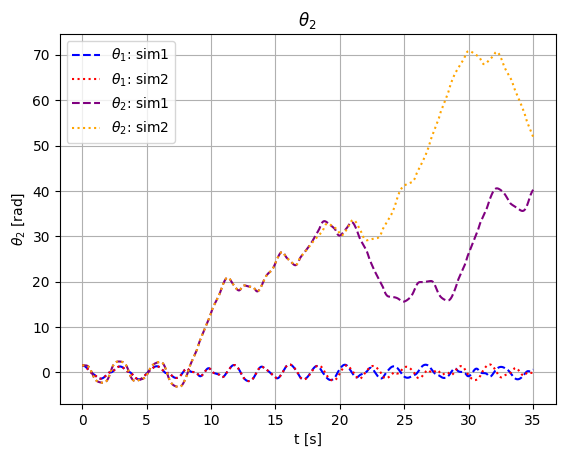

In [ ]:
# sim1, sim2의 시뮬레이션 결과(th2)
plt.title(r"$\theta_2$")
plt.grid()
plt.xlabel("t [s]")
plt.ylabel(r"$\theta_2$ [rad]")

plt.plot(sol1.t, sol1.y[0], c='blue', ls="--", label="$\\theta_1$: sim1")
plt.plot(sol2.t, sol2.y[0], c='red', ls=':', label="$\\theta_1$: sim2")
plt.plot(sol1.t, sol1.y[1], c='purple', ls='--', label="$\\theta_2$: sim1")
plt.plot(sol2.t, sol2.y[1], c='orange', ls=':', label="$\\theta_2$: sim2")

plt.legend()

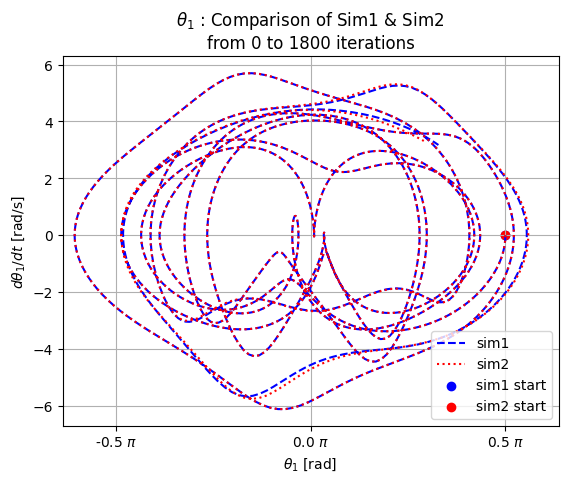

In [ ]:
# 초기 15초 동안 th1의 위상 도표
iter_limit = 1800
fig, ax = plt.subplots()
ax.grid()
ax.set_xlim([-2, 2])
ax.set_xticks(np.linspace(-np.pi/2, np.pi/2, 3))
ax.set_xticklabels([f"{k:.1f} $\pi$" for k in np.linspace(-0.5, 0.5, 3)])

ax.set_title(r"$\theta_1$ : Comparison of Sim1 & Sim2"+f"\nfrom 0 to {iter_limit} iterations")
ax.set_xlabel(r"$\theta_1$ [rad]")
ax.set_ylabel(r"$d\theta_1/dt$ [rad/s]")
ax.plot(sol1.y[0, :iter_limit], sol1.y[2, :iter_limit], color='blue', ls="--", label="sim1")
ax.plot(sol2.y[0, :iter_limit], sol2.y[2, :iter_limit], color='red', ls=":", label="sim2")

# 초기 상태
ax.scatter(sol1.y[0, 0], sol1.y[2, 0], c="b", label="sim1 start")
ax.scatter(sol2.y[0, 0], sol2.y[2, 0], c="red", label="sim2 start")
ax.legend()

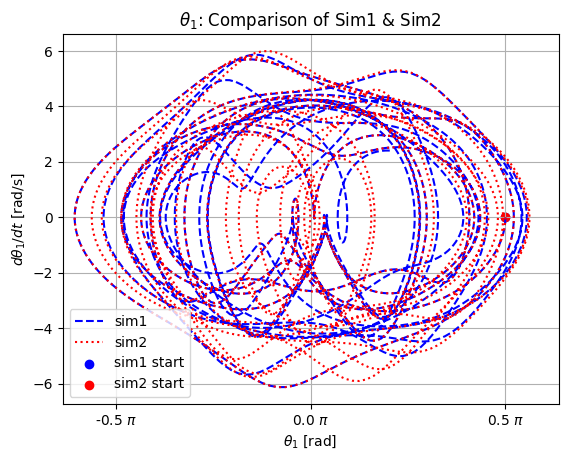

In [ ]:
# th1의 위상 도표 (전체; 50초)
fig, ax = plt.subplots()
ax.grid()
ax.set_xlim([-2, 2])
ax.set_xticks(np.linspace(-np.pi/2, np.pi/2, 3))
ax.set_xticklabels([f"{k:.1f} $\pi$" for k in np.linspace(-0.5, 0.5, 3)])

ax.set_title(r"$\theta_1$: Comparison of Sim1 & Sim2")
ax.set_xlabel(r"$\theta_1$ [rad]")
ax.set_ylabel(r"$d\theta_1/dt$ [rad/s]")
ax.plot(sol1.y[0], sol1.y[2], color='blue', ls="--", label="sim1")
ax.plot(sol2.y[0], sol2.y[2], color='red', ls=":", label="sim2")

# 초기 상태
ax.scatter(sol1.y[0, 0], sol1.y[2, 0], c="b", label="sim1 start")
ax.scatter(sol2.y[0, 0], sol2.y[2, 0], c="r", label="sim2 start")
ax.legend()

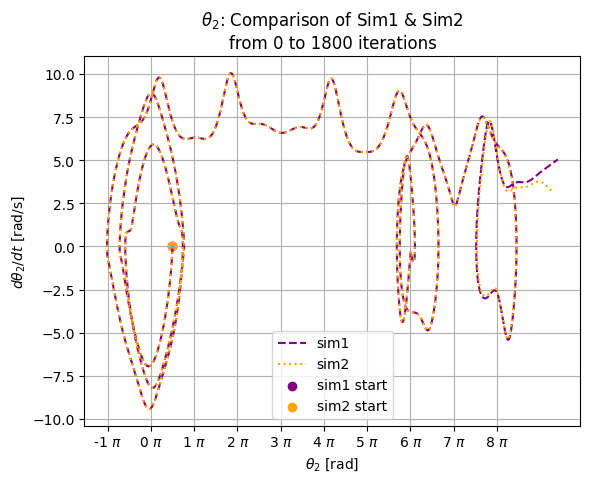

In [ ]:
# 초기 15초간 th2의 위상 도표
iter_limit = 1800

fig, ax = plt.subplots() # Create a figure and axes object
ax.grid()
ax.set_xticks(np.linspace(-np.pi, 8*np.pi, 10))
ax.set_xticklabels([f"{k:d} $\pi$" for k in range(-1,9)])

ax.set_title(r"$\theta_2$: Comparison of Sim1 & Sim2"+f"\nfrom 0 to {iter_limit} iterations")
ax.set_xlabel(r"$\theta_2$ [rad]")
ax.set_ylabel(r"$d\theta_2/dt$ [rad/s]")
ax.plot(sol1.y[1, :iter_limit], sol1.y[3, :iter_limit], c='purple', ls="--", label='sim1')
ax.plot(sol2.y[1, :iter_limit], sol2.y[3, :iter_limit], c='orange', ls=":", label='sim2')

# 초기 값
ax.scatter(sol1.y[1, 0], sol1.y[3, 0], c='purple', label='sim1 start')
ax.scatter(sol2.y[1, 0], sol2.y[3, 0], c='orange', label='sim2 start')
ax.legend()

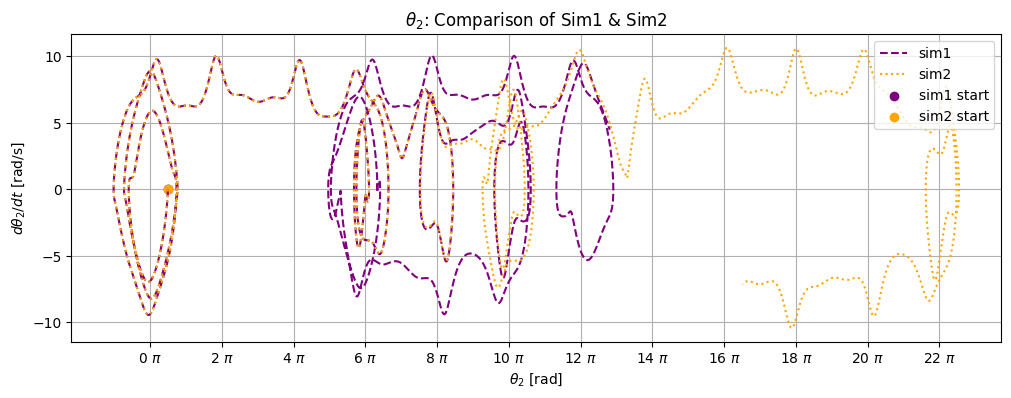

In [ ]:
#th2의 위상 도표 (전체; 50초)
fig, ax = plt.subplots(figsize=(12,4))
ax.grid()
ax.set_xticks(np.linspace(-0, 24*np.pi, 13))
ax.set_xticklabels([f"{k:d} $\pi$" for k in range(0, 25, 2)])

ax.set_title(r"$\theta_2$: Comparison of Sim1 & Sim2")
ax.set_xlabel(r"$\theta_2$ [rad]")
ax.set_ylabel(r"$d\theta_2/dt$ [rad/s]")
ax.plot(sol1.y[1], sol1.y[3], c='purple', ls="--", label='sim1')
ax.plot(sol2.y[1], sol2.y[3], c='orange', ls=":", label='sim2')
# Initial state points are too close to be clearly visible on the full 50s plot
# Initial state
ax.scatter(sol1.y[1, 0], sol1.y[3, 0], c='purple', label='sim1 start')
ax.scatter(sol2.y[1, 0], sol2.y[3, 0], c='orange', label='sim2 start')
ax.legend()

### 애니메이션 제작
추가 흔들리는 모습을 동영상으로 제작한다.

In [ ]:
# 시뮬레이션 결과를 직교좌표로 변환하는 함수 생성
x1f = sym.lambdify([[th1, th2]], x1.subs(params))
y1f = sym.lambdify([[th1, th2]], y1.subs(params))
x2f = sym.lambdify([[th1, th2]], x2.subs(params))
y2f = sym.lambdify([[th1, th2]], y2.subs(params))

In [ ]:
import matplotlib.animation as anim
from matplotlib.animation import PillowWriter # GIF 출력용

In [ ]:
sample_rate = 10 # Sampling Rate: 시뮬레이션 결과를 10개 마다 한 개씩만 그린다.
ts     = sol1.t
s1th1s = sol1.y[0]
s1th2s = sol1.y[1]
s1ths = np.array([s1th1s, s1th2s]).T

s2th1s = sol2.y[0]
s2th2s = sol2.y[1]
s2ths = np.array([s2th1s, s2th2s]).T

# 시뮬레이션 결과를 직교좌표로 변환
s1x1s = x1f([s1th1s, s1th2s])
s1y1s = y1f([s1th1s, s1th2s])
s1x2s = x2f([s1th1s, s1th2s])
s1y2s = y2f([s1th1s, s1th2s])

s2x1s = x1f([s2th1s, s2th2s])
s2y1s = y1f([s2th1s, s2th2s])
s2x2s = x2f([s2th1s, s2th2s])
s2y2s = y2f([s2th1s, s2th2s])

In [ ]:
# 프레임 작성 함수
# for color names, refer to:
# https://matplotlib.org/stable/gallery/color/named_colors.html

# 마커 크기(면적)를 추의 질량에 비례하도록 지정
marker_sizes = 20 * np.array([params[m1], params[m2]])

def frame(n):
  s1x1, s1y1 = s1x1s[::sample_rate][n], s1y1s[::sample_rate][n]
  s1x2, s1y2 = s1x2s[::sample_rate][n], s1y2s[::sample_rate][n]
  s2x1, s2y1 = s2x1s[::sample_rate][n], s2y1s[::sample_rate][n]
  s2x2, s2y2 = s2x2s[::sample_rate][n], s2y2s[::sample_rate][n]

  ax.cla() # 화면 초기화

  # 화면 영역 지정
  ax.set_xlim(-2.5, 2.5)
  ax.set_ylim(-2.5, 1.0)

  # 제목 란에 시간 표시
  ax.set_title(f'{ts[::sample_rate][n]:.2f} s')

  ax.set_xlabel(r"x [m]")
  ax.set_ylabel(r"y [m]")
  ax.grid(alpha=0.3)

  ax.scatter(0,0, marker='+', c='k')

  # sim1 결과
  # 막대
  ax.plot([0, s1x1, s1x2], [0, s1y1, s1y2], c='midnightblue', alpha=0.5)

  # 추
  ax.scatter([s1x1, s1x2], [s1y1, s1y2], \
             s = marker_sizes, \
             facecolors='white', edgecolor=["blue", "purple"], zorder=2)

  # sim2 결과
  # 막대
  ax.plot([0, s2x1, s2x2], [0, s2y1, s2y2], c='brown', alpha=0.5)

  # 추
  ax.scatter([s2x1, s2x2], [s2y1, s2y2], \
             s = marker_sizes, \
             facecolors='white', edgecolor=["red", "orange"], zorder=2)

  # 최근 자취의 시작 인덱스
  imin = max(0, n*sample_rate - 100)

  # 2번 추의 최근 자취
  ax.plot(s1x2s[imin:n*sample_rate+1], s1y2s[imin:n*sample_rate+1], lw=1.5, c='purple', alpha=0.3, zorder=1)
  ax.plot(s2x2s[imin:n*sample_rate+1], s2y2s[imin:n*sample_rate+1], lw=2, c='orange', alpha=0.3, zorder=1)

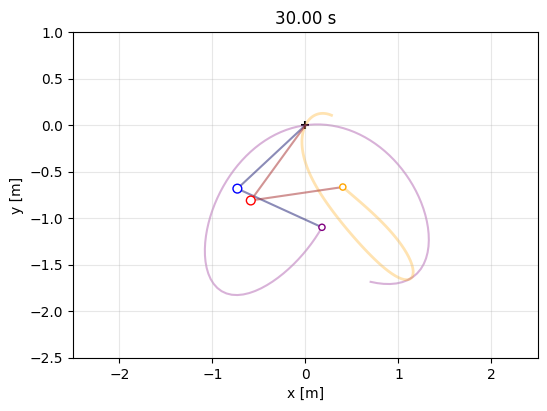

In [ ]:
# 한 프레임을 그려 확인
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.set_aspect('equal')
frame(300)
#plt.savefig("doublependulum.png")

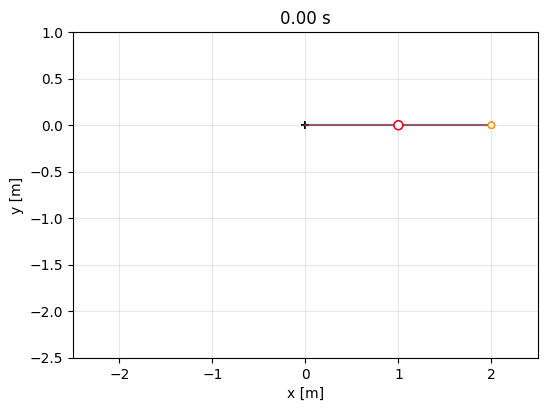

In [ ]:
# 애니메이션 정의
N = len(ts)//sample_rate
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_aspect('equal')            # 가로-세로 비를 좌표 값에 비례하도록 지정
ani = anim.FuncAnimation(fig, frame, frames = N)

In [ ]:
#애니메이션을 파일로 출력(moving GIF)
# "DP" for "double pendulum"

fr = 100/sample_rate

print("Saving animation ...")
ani.save("DP.gif", writer='pillow', dpi=100, fps=fr)
print("Done.")

Saving animation ...
Done.


In [ ]:
#애니메이션을 파일로 출력(AVI)
# "DP" for "double pendulum"

fr = 100/sample_rate
print("Saving animation ...")
ani.save("DP.avi", dpi=150, fps=fr)
print("Done.")